In [1]:
import pandas as pd
%matplotlib inline

In [2]:
fire = pd.read_csv("Fire.csv")
fire.head(5)

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [3]:
fire = fire.drop(axis = 1, labels = 'address')
fire = fire.drop(axis = 1, labels = 'census_tract')
fire = fire.drop(axis = 1, labels = 'ward')
fire = fire.drop(axis = 1, labels = 'tract')
fire = fire.drop(axis = 1, labels = 'public_works_division')
fire = fire.drop(axis = 1, labels = 'pli_division')
fire = fire.drop(axis = 1, labels = 'police_zone')
fire = fire.drop(axis = 1, labels = 'latitude')
fire = fire.drop(axis = 1, labels = 'longitude')
fire = fire.drop(axis = 1, labels = 'call_no')
fire = fire.drop(axis = 1, labels = 'type_description')
fire = fire.drop(axis = 1, labels = 'alarm_time')
fire = fire.drop(axis = 1, labels = 'alarms')
fire = fire.drop(axis = 1, labels = 'council_district')
fire = fire.drop(axis = 1, labels = 'primary_unit')
fire = fire.drop(axis = 1, labels = 'fire_zone')
fire.sample(5)

,incident_type,neighborhood
3346,113.0,Allentown
6658,111.0,NaN
6464,131.0,Hazelwood
6067,113.0,Sheraden
7182,142.0,Mount Washington


In [4]:
fire.dropna(axis = 0, inplace = True)
fire.sort_values("incident_type")

,incident_type,neighborhood
623,100.0,Squirrel Hill South
7387,100.0,Bluff
5737,100.0,Beltzhoover
5124,100.0,Beltzhoover
3837,100.0,East Allegheny
...,...,...
4455,170.0,California-Kirkbride
3902,170.0,Point Breeze North
7184,170.0,South Side Slopes
2120,171.0,Manchester


In [5]:
weighted_case = []
size = fire['incident_type'].size
for i in range (size):
    if (fire.iat[i, 0] == 111):
        weighted_case.append(1.2)
    elif (fire.iat[i, 0] == 131):
        weighted_case.append(1.5)
    else:
        weighted_case.append(1)
# print(weighted_case)
fire["value"] = weighted_case
fire.sample(10)

,incident_type,neighborhood,value
2368,142.0,Lower Lawrenceville,1.0
343,118.0,Point Breeze,1.0
4571,111.0,East Hills,1.2
1555,113.0,Knoxville,1.0
492,113.0,Terrace Village,1.0
1140,143.0,South Side Flats,1.0
4440,111.0,Northview Heights,1.2
1830,131.0,East Liberty,1.5
3714,130.0,Brighton Heights,1.0
582,113.0,Homewood West,1.0


In [6]:
values = fire.groupby(['neighborhood']).mean()

In [7]:
values.head(10)

,incident_type,value
neighborhood,,
Allegheny Center,131.204082,1.038776
Allegheny West,135.470588,1.147059
Allentown,124.990566,1.128302
Arlington,132.121951,1.085366
Arlington Heights,120.250000,1.058333
Banksville,128.372549,1.098039
Bedford Dwellings,122.277778,1.075000
Beechview,127.092437,1.133613
Beltzhoover,124.486239,1.146789


In [8]:
values.drop(axis = 1, labels = "incident_type", inplace = True)

In [9]:
fbn = fire.groupby(['neighborhood']).count()
fbn.drop(axis = 1, labels = "value", inplace = True)

In [10]:
fbn.head(5)

,incident_type
neighborhood,
Allegheny Center,49
Allegheny West,34
Allentown,106
Arlington,41
Arlington Heights,12


In [11]:
fbn.rename(columns = {"incident_type": "case_count"}, inplace = True)

In [12]:
fbn.head(5)

,case_count
neighborhood,
Allegheny Center,49
Allegheny West,34
Allentown,106
Arlington,41
Arlington Heights,12


In [13]:
fbn_sorted = fbn.sort_values("case_count")
fbn_sorted

,case_count
neighborhood,
Regent Square,6
Mount Oliver Borough,6
East Carnegie,8
Mt. Oliver,10
Chartiers City,11
...,...
Hazelwood,206
South Side Flats,207
Squirrel Hill South,210


<AxesSubplot:xlabel='neighborhood', ylabel='total cases'>

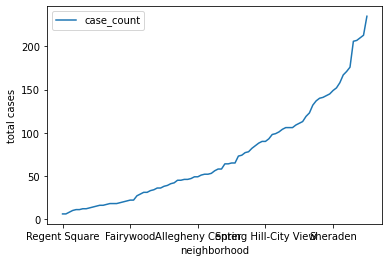

In [14]:
fbn_sorted.plot(xlabel = 'neighborhood', ylabel = 'total cases')

In [15]:
fbn_sorted.merge(values, how='inner', on='neighborhood')

,case_count,value
neighborhood,,
Regent Square,6,1.116667
Mount Oliver Borough,6,1.066667
East Carnegie,8,1.050000
Mt. Oliver,10,1.080000
Chartiers City,11,1.100000
...,...,...
Hazelwood,206,1.089806
South Side Flats,207,1.053623
Squirrel Hill South,210,1.078571
